In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [2]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [3]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [4]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [5]:
def print_quantile(func, ps):
    quantiles = list(map(lambda x: np.round(x, 3), func.ppf(ps)))
    df = pd.DataFrame()
    df['Pд'] = ps
    df['Значение квантили fp'] = quantiles
    return df

In [6]:
print_quantile(sps.norm(0, 1), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.282
1,0.990,2.326
2,0.999,3.090


In [7]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders(means, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,11.786412,7.678413,8.101896,10.473891,8.924777,8.992879,6.030160,10.816995,10.238110,10.106184,9.314972,8.504447,10.125496
1,7.551412,11.719978,8.949726,8.491971,10.327061,10.057765,8.614556,10.720233,6.344741,13.560437,9.633788,8.823264,10.444312
2,10.399662,9.992583,11.500175,11.137712,6.894191,12.939740,7.007330,11.148487,11.442737,9.145454,10.160807,9.350283,10.971332
3,9.036433,7.559224,7.807089,13.162420,7.338425,7.007332,10.798522,9.344397,10.068906,13.446270,9.556902,8.746377,10.367426
4,11.959200,12.923907,9.229316,9.686217,8.725426,8.883273,14.407941,9.919124,11.584961,10.295088,10.761445,9.950921,11.571970


In [8]:
def draw_borders(left, right):
    x = np.linspace(1, 50, 50)
    plt.axis([0, 51, 5, 15])
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер испытания')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

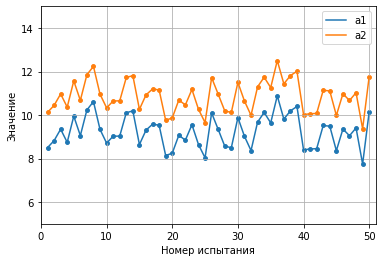

In [9]:
draw_borders(left, right)

In [10]:
left, right = get_borders(means, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,11.786412,7.678413,8.101896,10.473891,8.924777,8.992879,6.030160,10.816995,10.238110,10.106184,9.314972,7.843660,10.786283
1,7.551412,11.719978,8.949726,8.491971,10.327061,10.057765,8.614556,10.720233,6.344741,13.560437,9.633788,8.162476,11.105100
2,10.399662,9.992583,11.500175,11.137712,6.894191,12.939740,7.007330,11.148487,11.442737,9.145454,10.160807,8.689496,11.632119
3,9.036433,7.559224,7.807089,13.162420,7.338425,7.007332,10.798522,9.344397,10.068906,13.446270,9.556902,8.085590,11.028213
4,11.959200,12.923907,9.229316,9.686217,8.725426,8.883273,14.407941,9.919124,11.584961,10.295088,10.761445,9.290134,12.232757


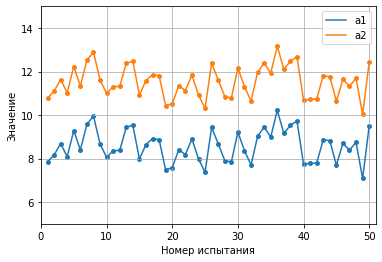

In [11]:
draw_borders(left, right)

In [12]:
left, right = get_borders(means, 0.999)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,11.786412,7.678413,8.101896,10.473891,8.924777,8.992879,6.030160,10.816995,10.238110,10.106184,9.314972,7.360537,11.269406
1,7.551412,11.719978,8.949726,8.491971,10.327061,10.057765,8.614556,10.720233,6.344741,13.560437,9.633788,7.679353,11.588222
2,10.399662,9.992583,11.500175,11.137712,6.894191,12.939740,7.007330,11.148487,11.442737,9.145454,10.160807,8.206373,12.115242
3,9.036433,7.559224,7.807089,13.162420,7.338425,7.007332,10.798522,9.344397,10.068906,13.446270,9.556902,7.602467,11.511336
4,11.959200,12.923907,9.229316,9.686217,8.725426,8.883273,14.407941,9.919124,11.584961,10.295088,10.761445,8.807011,12.715880


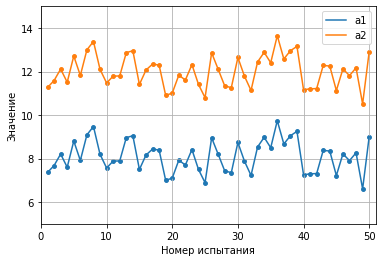

In [13]:
draw_borders(left, right)

### Для случая с неизвестной дисперсией

In [14]:
print_quantile(sps.t(df=9), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.383
1,0.990,2.821
2,0.999,4.297


In [15]:
def get_borders_unknown_disp(means, std, p):
    stud_rv = sps.t(df=9)
    tp = stud_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - tp*(std[i]/np.sqrt(10)))
        right.append(means[i] + tp*(std[i]/np.sqrt(10)))

    return np.array(left), np.array(right)

In [16]:
samples = get_normal_samples(10)
means = get_means(samples)
std = list(map(lambda x : statistics.stdev(x), samples))
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders_unknown_disp(means, std, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.680527,9.873302,7.777491,7.028047,14.542502,9.298816,8.131141,6.748147,7.497531,8.681829,9.025933,8.016372,10.035494
1,10.275790,9.476636,9.282932,5.736971,8.028221,11.294619,6.756945,10.149762,11.509680,9.321024,9.183258,8.368811,9.997704
2,9.495350,12.537963,10.998233,10.125158,8.069870,12.214401,7.627144,12.263326,7.912585,10.592767,10.183680,9.365970,11.001389
3,10.442228,6.883706,9.491995,12.675273,8.810005,8.696805,9.787965,9.671391,6.642181,14.016910,9.711846,8.710600,10.713092
4,11.572344,10.357077,10.462353,10.395180,7.794481,9.032625,9.049107,7.222955,10.025949,8.677503,9.458957,8.872036,10.045879


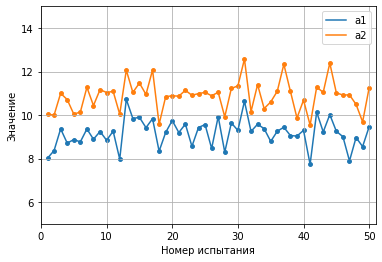

In [17]:
draw_borders(left, right)

In [18]:
left, right = get_borders_unknown_disp(means, std, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.680527,9.873302,7.777491,7.028047,14.542502,9.298816,8.131141,6.748147,7.497531,8.681829,9.025933,6.966385,11.085481
1,10.275790,9.476636,9.282932,5.736971,8.028221,11.294619,6.756945,10.149762,11.509680,9.321024,9.183258,7.521752,10.844764
2,9.495350,12.537963,10.998233,10.125158,8.069870,12.214401,7.627144,12.263326,7.912585,10.592767,10.183680,8.515517,11.851842
3,10.442228,6.883706,9.491995,12.675273,8.810005,8.696805,9.787965,9.671391,6.642181,14.016910,9.711846,7.669261,11.754431
4,11.572344,10.357077,10.462353,10.395180,7.794481,9.032625,9.049107,7.222955,10.025949,8.677503,9.458957,8.261612,10.656303


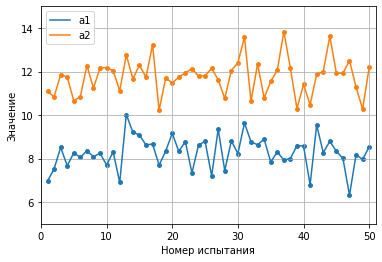

In [19]:
draw_borders(left, right)

## Интервалы для среднего и стандартного отклонения нормальной совокупности

In [20]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999]
pss = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in pss:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для a:')
df

Интервалы для a:


,left,right
0.800,9.168166,10.314421
0.900,9.005692,10.476894
0.950,8.864771,10.617816
0.980,8.700919,10.781668
0.990,8.589347,10.893239
0.995,8.485950,10.996637
0.998,8.359299,11.123287
0.999,8.269725,11.212862


In [21]:
n = 10
left, right = [], []
std = statistics.stdev(sample)
for p in ps:
    tp = sps.t(df=9).ppf(p)
    chi2_rv = sps.chi2(df=19)
    t1 = chi2_rv.ppf((1+p)/2)
    t2 = chi2_rv.ppf((1-p)/2)
    left.append(std * np.sqrt((n-1) / t1))
    right.append(std * np.sqrt((n-1) / t2))
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для sigma:')
df

Интервалы для sigma:


,left,right
0.800,0.763165,1.166141
0.900,0.724994,1.251426
0.950,0.694461,1.333759
0.980,0.661655,1.440759
0.990,0.640822,1.521518
0.995,0.622514,1.602808
0.998,0.601304,1.711829
0.999,0.587056,1.795920


In [22]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(size=20)
stud_rv = sps.t(df=19)
chi2_rv = sps.chi2(df=19)
Pd = 0.95
print(stud_rv.ppf(Pd))
print(chi2_rv.ppf(1-Pd))
print('Верхняя граница для a: ', np.round(sample.mean() + stud_rv.ppf(Pd) * statistics.stdev(sample) / np.sqrt(20), 2))
print('Верхняя граница для a: ', np.round(statistics.stdev(sample) * np.sqrt((n-1) / chi2_rv.ppf(1-Pd)), 2))

1.729132811521367
10.117013063859051
Верхняя граница для a:  10.56
Верхняя граница для a:  1.47


## Задача

n=20, Pд=0.99, a=300

In [30]:
N = 10000
a = 300
n = 20

expon_rv = sps.expon(loc=a)
sample = expon_rv.rvs(n)
sample

array([300.07164062, 300.08471781, 300.39073531, 300.08418692,
       300.77666545, 300.16561366, 300.07648706, 303.2838923 ,
       301.31683095, 301.41284933, 300.53782333, 300.92620181,
       301.03578887, 300.05805558, 300.06496392, 301.501056  ,
       300.88495202, 300.00836169, 300.73577917, 300.42426618])

In [31]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print('t1 =', np.round(t1, 2), 't2 =', np.round(t2, 2))
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

t1 = 20.71 t2 = 66.77
Доверительный интервал для a (180.15, 580.86)
Доверительный интервал для M (824.78, 2423.63)
